In [1]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
import pandas as pd, scipy.stats as stats

# Black Scholes Generator

In [79]:
class blackScholesGenerator:
    def __init__(self
                 , initialPrice = 100.0
                 , volatility = 0.2
                 , timeToExpiry = 1.0
                 , riskFreeRate = 0.0
                 , numPaths = 1
                 , numTradingDates = 10):
        
        self.initialPrice = initialPrice
        self.volatility = volatility
        self.timeToExpiry = timeToExpiry
        self.riskFreeRate = riskFreeRate
        self.numPaths = numPaths
        self.numTradingDates = numTradingDates
        
    def blackScholesPaths(self):
        # Black Scholes Paths created using geometric Brownian Motion
        # Closed form solution for Price Path
        deltaT = self.timeToExpiry / self.numTradingDates
        
        normMatrix = np.random.normal(loc = 0.0
                                      , scale = 1.0
                                      , size = (self.numTradingDates, self.numPaths)
                                     )
        
        exponentialTerm = np.cumsum(np.append(np.zeros((1, self.numPaths))
                                              , (self.riskFreeRate - 0.5 * self.volatility ** 2) *
                                              deltaT + np.sqrt(deltaT) * self.volatility * normMatrix
                                              , axis = 0)
                                   , axis = 0
                                   )
        
        bsPaths = self.initialPrice * np.exp(exponentialTerm)
        return pd.DataFrame(bsPaths)
                           
                           

<AxesSubplot:>

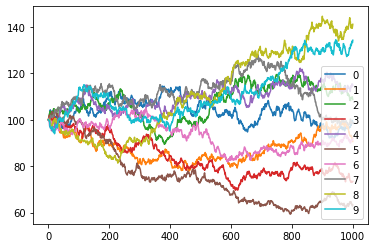

In [81]:
blackExample = blackScholesGenerator(initialPrice = 100.0
                                     , volatility = 0.2
                                     , timeToExpiry = 1.0
                                     , riskFreeRate = 0.0
                                     , numPaths = 10
                                     , numTradingDates = 1000).blackScholesPaths()

blackExample.plot()